In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import pi
import matplotlib.cm as cm

# Essa função vai ser usada abaixo. Ela encontra a matriz (homografia) 
# que quando multiplicada pela imagem de entrada gera a imagem de 
def find_homography_draw_box(kp1, kp2, img_cena):
    out = img_cena.copy()
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # Tenta achar uma trasformacao composta de rotacao, translacao e escala que situe uma imagem na outra
    # Esta transformação é chamada de homografia 
    # Para saber mais veja 
    # https://docs.opencv.org/3.4/d9/dab/tutorial_homography.html
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img_original.shape
    # Um retângulo com as dimensões da imagem original
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

    # Transforma os pontos do retângulo para onde estao na imagem destino usando a homografia encontrada
    dst = cv2.perspectiveTransform(pts,M)

    # Desenha um contorno em vermelho ao redor de onde o objeto foi encontrado
    img2b = cv2.polylines(out,[np.int32(dst)],True,(255,255,0),5, cv2.LINE_AA)
    return img2b

# Número mínimo de pontos correspondentes
MIN_MATCH_COUNT = 10

cena_bgr = cv2.imread("logo_encontrar3.jpg") # Imagem do cenario
original_bgr = cv2.imread("insper_logo2.jpeg")
# Versões RGB das imagens, para plot
original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
cena_rgb = cv2.cvtColor(cena_bgr, cv2.COLOR_BGR2RGB)

# Versões grayscale para feature matching
img_original = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2GRAY)
img_cena = cv2.cvtColor(cena_bgr, cv2.COLOR_BGR2GRAY)

framed = None

# Imagem de saída
out = cena_rgb.copy()


# Cria o detector BRISK
brisk = cv2.BRISK_create()

# Encontra os pontos únicos (keypoints) nas duas imagems
kp1, des1 = brisk.detectAndCompute(img_original ,None)
kp2, des2 = brisk.detectAndCompute(img_cena,None)

# Configura o algoritmo de casamento de features que vê *como* o objeto que deve ser encontrado aparece na imagem
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


# Tenta fazer a melhor comparacao usando o algoritmo
matches = bf.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


if len(good)>MIN_MATCH_COUNT:
    # Separa os bons matches na origem e no destino
    print("Matches found")    
    framed = find_homography_draw_box(kp1, kp2, cena_rgb)
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))


Matches found


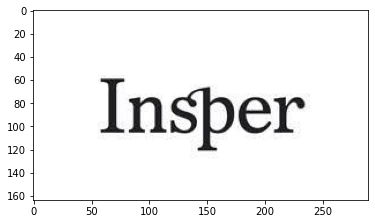

In [4]:
plt.imshow(original_bgr)

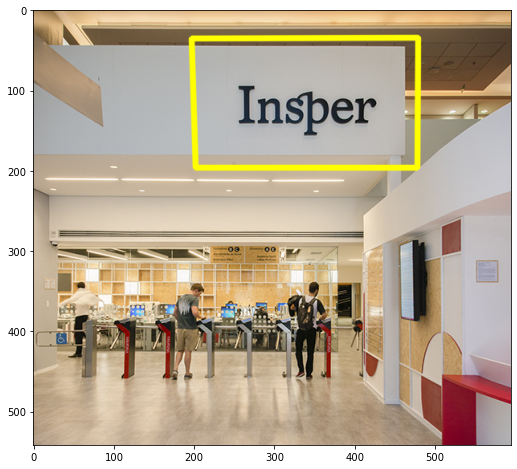

In [2]:
plt.figure(figsize=(10,8))
plt.imshow(framed)

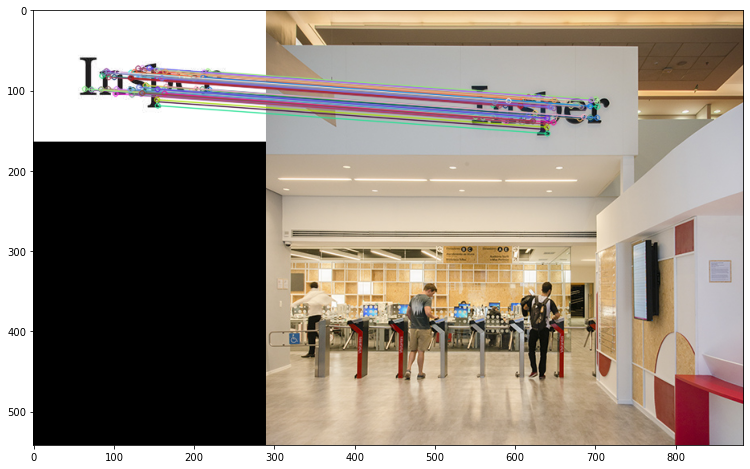

In [3]:
#np.random.choice(matches,100)
img3 = cv2.drawMatches(original_rgb,kp1,cena_rgb,kp2, good,       None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(13,8))
plt.imshow(img3)